# Deep Neural Network

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


## Importing the Dataset

In [2]:
NUM_CLASSES = 10

In [3]:
# collection of CIFAR-10 dataset, having 60,000 records
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1351s 8us/step


In [4]:
# Each image data consists of pixels range between 0 and 255.
# Neural network works best with input values range between -1 and 1.
# Therefore diving each pixel value by 255 to normalize the values between -1 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
# Value of the pixel at position x = 23 and y = 13 of image indexed 54.
# Here 1 refers to the green channel among the RGB channels.
x_train[54, 12, 13, 1]

0.36862746

## Architecture of the Model

In [6]:
# (32, 32, 3) here the image size is 32x32 and the number of channels in each image is 3 ( RGB channels)
input_layer = Input((32,32,3))

# flattening this input into a vector, using a Flatten layer. This will result a vector of length 3,072 (= 32 × 32 × 3)
# dense layers take input as a vector instead of multidimensional array.
x = Flatten()(input_layer)

# first dense layer consists of 200 units (OR Nodes) that is connected with each and every units of the previous layer.
# that means 200 units is connected with 3,072 units of flatten layer.
# second dense layer consists of 150 units that is connected with each and every units of first dense layer.
# here we use the Rectified Linear Units (ReLU) activation function.
x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

# output layer consists of 10 units.
# here we use the softmax activation function whicch is more effective and efficient way to evaluate the result.
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

# preparing the mathematical model (OR deep learning model)
model = Model(input_layer, output_layer)

In [7]:
# summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [8]:
# using the Adam optimizer with learning rate 0.0005
# optimizers are used to update the weights in NNs based on the gradient of the loss function.
# the greater the learning rate, the larger the change in weights at each training step.
# the training might be initial faster with large learning rate
# the result is less efficient and effective and we cannot get the minima of the loss function.
# metrics parameter to specify the matrics or the training parameters like accuracy during the training process.
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
# model achieves the accuracy of 51.27%
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 20s 401us/step - loss: 1.8476 - accuracy: 0.3332
Epoch 2/10
50000/50000 [==============================] - 19s 385us/step - loss: 1.6615 - accuracy: 0.4087
Epoch 3/10
50000/50000 [==============================] - 19s 381us/step - loss: 1.5929 - accuracy: 0.4314
Epoch 4/10
50000/50000 [==============================] - 19s 383us/step - loss: 1.5418 - accuracy: 0.4517
Epoch 5/10
50000/50000 [==============================] - 20s 407us/step - loss: 1.4981 - accuracy: 0.4654
Epoch 6/10
50000/50000 [==============================] - 19s 385us/step - loss: 1.4661 - accuracy: 0.4782
Epoch 7/10
50000/50000 [==============================] - 19s 382us/step - loss: 1.4372 - accuracy: 0.4904
Epoch 8/10
50000/50000 [==============================] - 20s 390us/step - loss: 1.4158 - accuracy: 0.4943
Epoch 9/10
50000/50000 [==============================] - 20s 392us/step - loss: 1.3903 - accuracy: 0.5038s
Epoch 10/10
50000/50000 [===========

## Model Evaluation on Test Set

In [10]:
# model predicts the test set with 48% accuracy
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 113us/step


[1.4536994825363159, 0.48330000042915344]

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# argmax gives us the index of maximum value of 10 classes
# axis = -1 tells to include result of all the classes
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

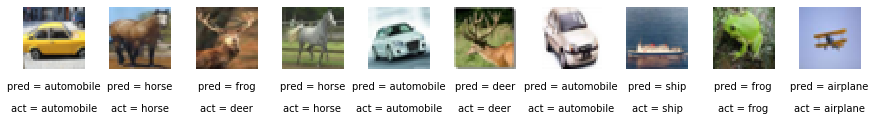

In [12]:
n_to_show = 10
# get ten random x_test dataset indexes of images
indices = np.random.choice(range(len(x_test)), n_to_show)

# hspace: the amount of width reserved for space between subplots
# wspace: the amount of height reserved for space between subplots
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# ax.text : add text to an arbitrary location of an axis.
# Transform from axes coords to display coords using transAxes
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)